# Decision Tree

In [2]:
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

In [3]:
import pandas as pd

df = pd.read_csv("data.csv", delimiter=';')

num_entries = df.shape[0]
num_features = df.shape[1]

print(f"{num_entries} entries with {num_features} features")

4424 entries with 37 features


In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
X = df.drop(columns=['Target'])

y = df['Target']

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = feature_importances.sort_values(ascending=False)

top_n = 10

selected_columns = important_features.index[:top_n]
X_new = X[selected_columns]

selected_columns


Index(['Curricular units 2nd sem (approved)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)',
       'Admission grade', 'Tuition fees up to date',
       'Curricular units 2nd sem (evaluations)', 'Age at enrollment',
       'Previous qualification (grade)', 'Course'],
      dtype='object')

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.colors import ListedColormap
from itertools import combinations

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [18]:
set(y)

{'Dropout', 'Enrolled', 'Graduate'}

In [19]:
y_encoded

array([0, 2, 0, ..., 0, 2, 2])

In [21]:
def find_best_combinations():
    combinations_2_features = list(combinations(X_new.columns, 2))
    scores = {}

    for feature1, feature2 in combinations_2_features:
        X_plot = X_new[[feature1, feature2]].values
        X_train, X_val, y_train, y_val = train_test_split(X_plot, y_encoded, test_size=0.2, random_state=42)

        tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
        score = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean()
        scores[(feature1, feature2)] = score


    best_combinations = sorted(scores.items(), key=lambda item: item[1], reverse=True)[:3]

    print("Best combinations based on cross-validation scores:")
    for comb, score in best_combinations:
        print(f"{comb}: {score:.4f}")

    return best_combinations

best_combinations = find_best_combinations()

Best combinations based on cross-validation scores:
('Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)'): 0.7174
('Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)'): 0.7174
('Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)'): 0.7174


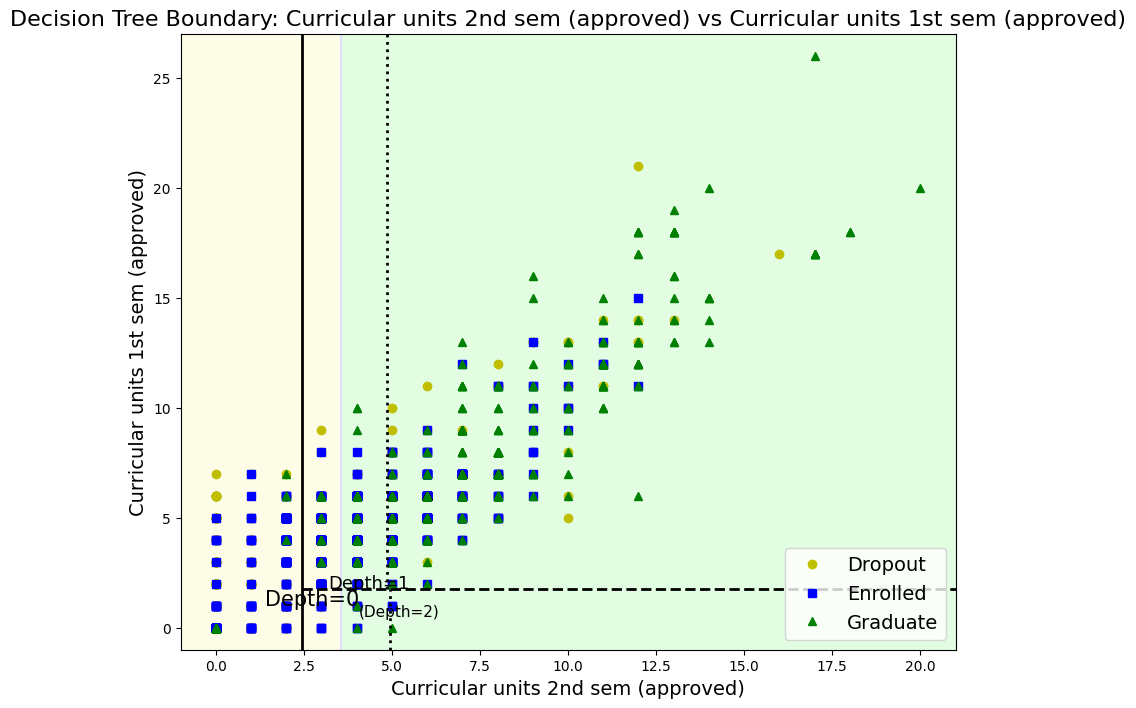

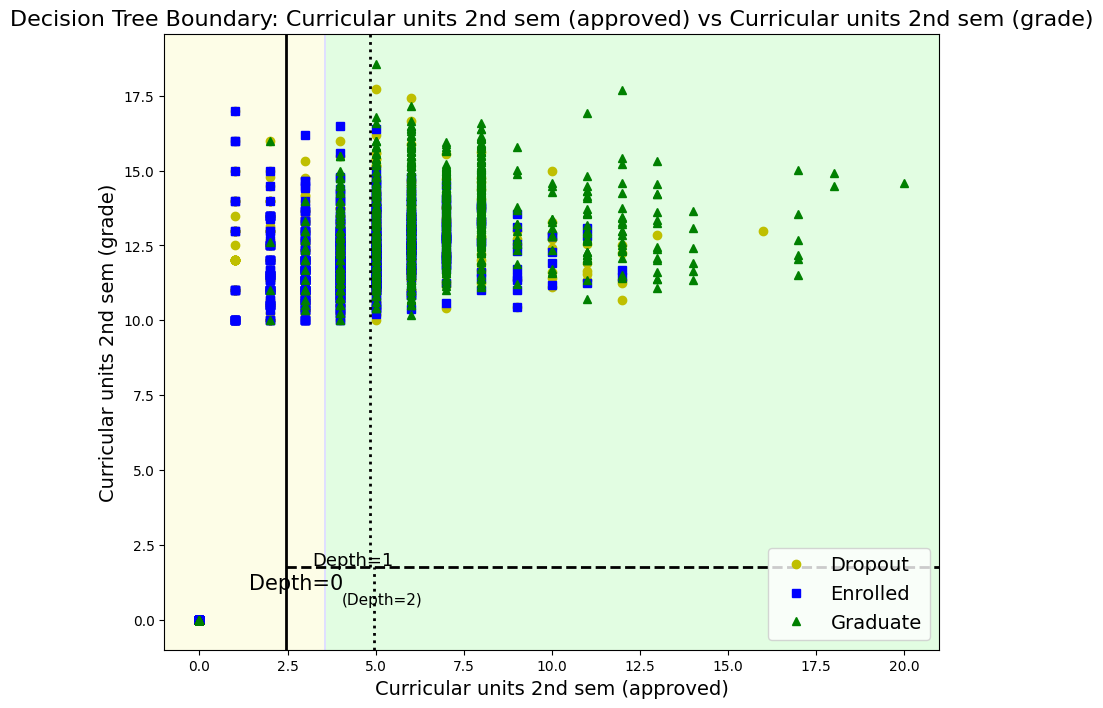

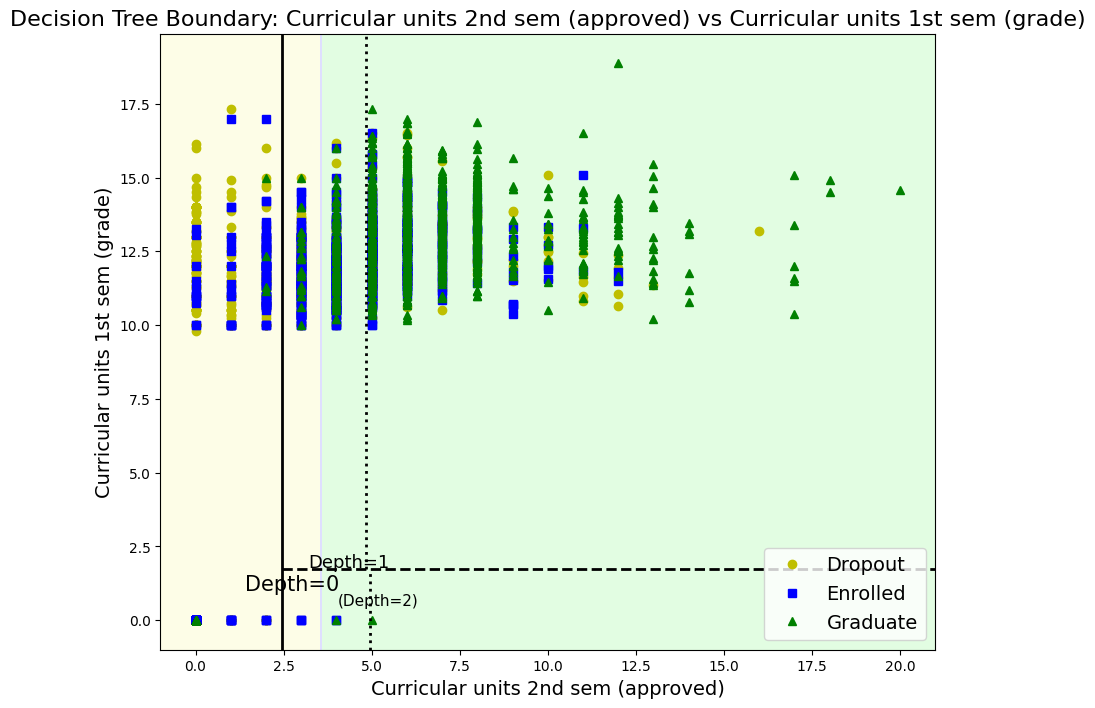

In [34]:
def plot_decision_boundary_with_split_lines(clf, X, y, axes=None, legend=True, plot_training=True):
    if axes is None:
        x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        axes = [x0_min, x0_max, x1_min, x1_max]

    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Dropout")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Enrolled")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Graduate")

    plt.plot([2.45, 2.45], [axes[2], axes[3]], "k-", linewidth=2)
    plt.plot([2.45, axes[1]], [1.75, 1.75], "k--", linewidth=2)
    plt.plot([4.95, 4.95], [axes[2], 1.75], "k:", linewidth=2)
    plt.plot([4.85, 4.85], [1.75, axes[3]], "k:", linewidth=2)

    plt.text(1.40, 1.0, "Depth=0", fontsize=15)
    plt.text(3.2, 1.80, "Depth=1", fontsize=13)
    plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

    plt.axis(axes)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

for (feature1, feature2), score in best_combinations:
    X_plot = X_new[[feature1, feature2]].values
    X_train, X_val, y_train, y_val = train_test_split(X_plot, y_encoded, test_size=0.2, random_state=42)

    tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    tree_clf.fit(X_train, y_train)

    plt.figure(figsize=(10, 8))
    plot_decision_boundary_with_split_lines(tree_clf, X_train, y_train)
    plt.xlabel(feature1, fontsize=14)
    plt.ylabel(feature2, fontsize=14)
    plt.title(f"Decision Tree Boundary: {feature1} vs {feature2}", fontsize=16)
    plt.show()


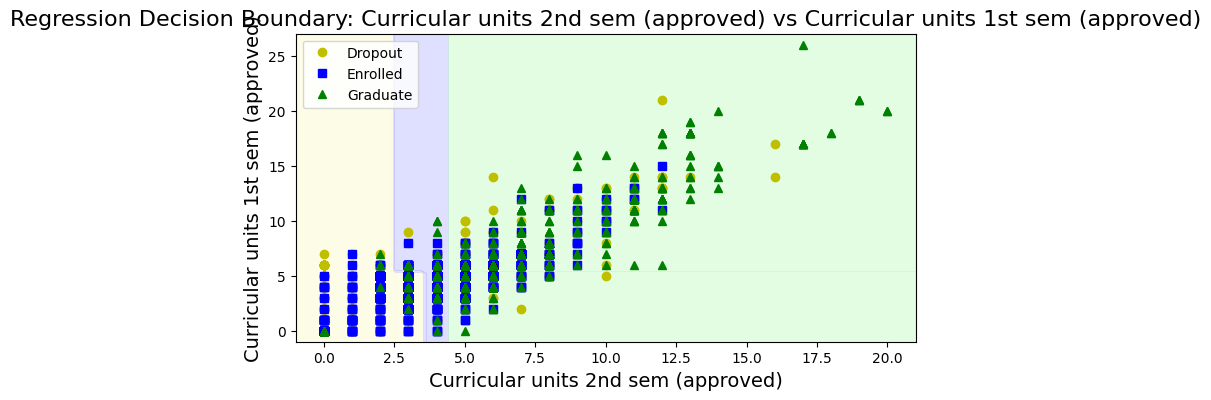

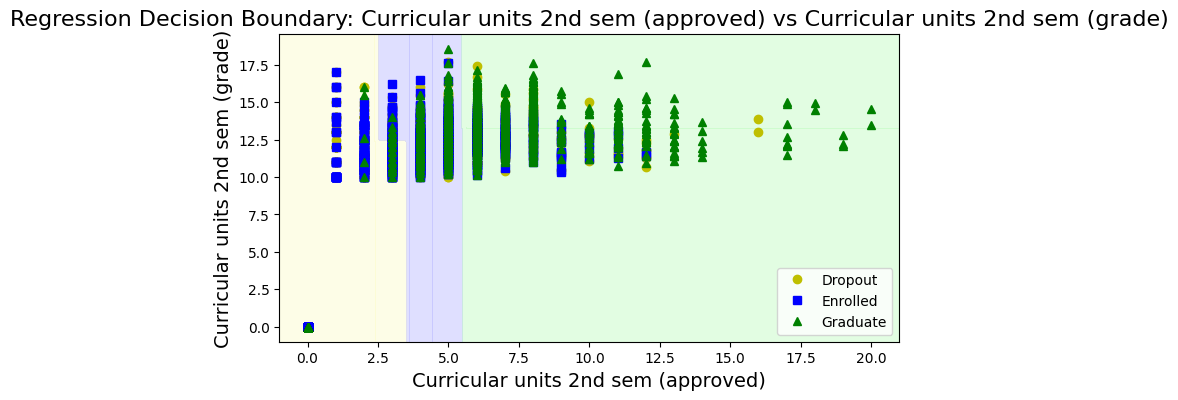

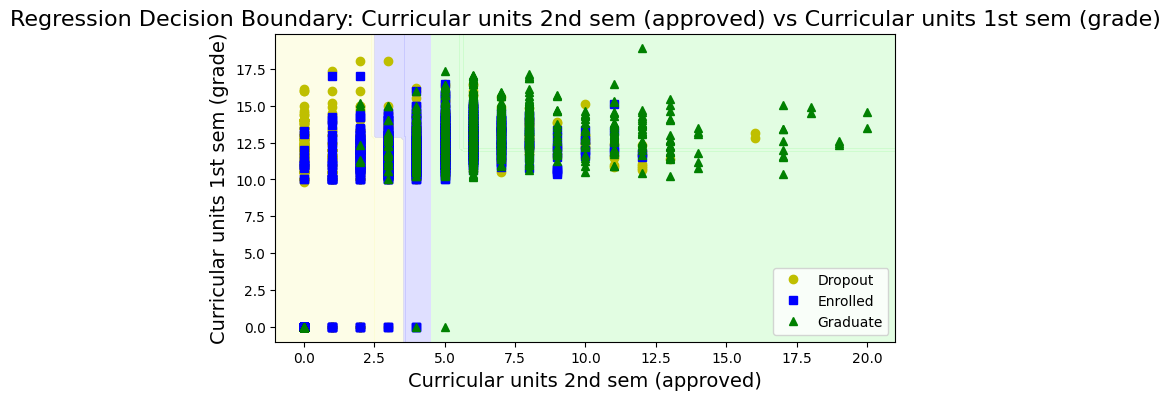

In [36]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# 결정 경계 시각화 함수 (회귀 트리에도 적용)
def plot_decision_boundary_with_regression(clf, X, y, axes=None, plot_training=True, title=None):
    if axes is None:
        x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        axes = [x0_min, x0_max, x1_min, x1_max]

    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    # 카테고리별 데이터 산점도
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Dropout")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Enrolled")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Graduate")

    plt.axis(axes)
    if title:
        plt.title(title)
    plt.legend()

# 상위 3개의 조합에 대해 회귀 트리 시각화
for (feature1, feature2), score in best_combinations:
    X_plot = X_new[[feature1, feature2]].values
    y_plot = y_encoded  # y 값은 각 카테고리로 분류된 값 (0, 1, 2)

    # 회귀 트리 학습
    tree_reg = DecisionTreeRegressor(random_state=42, max_depth=3)
    tree_reg.fit(X_plot, y_plot)

    # 시각화
    plt.figure(figsize=(8, 4))
    plot_decision_boundary_with_regression(tree_reg, X_plot, y_plot)
    plt.xlabel(feature1, fontsize=14)
    plt.ylabel(feature2, fontsize=14)
    plt.title(f"Regression Decision Boundary: {feature1} vs {feature2}", fontsize=16)
    plt.show()


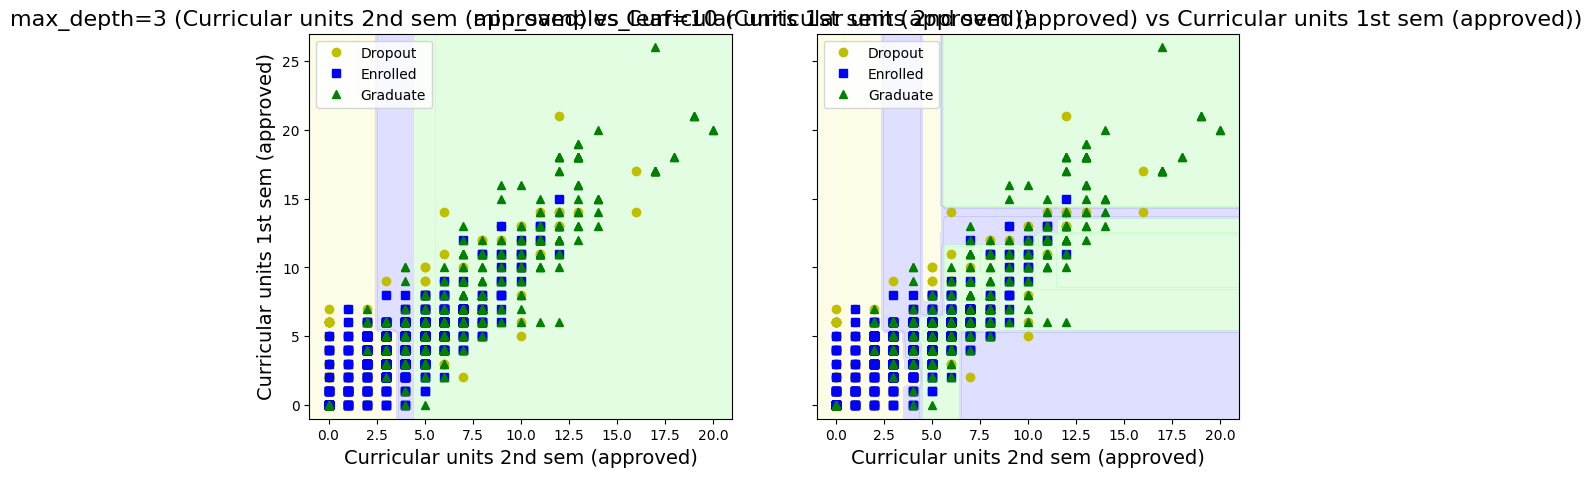

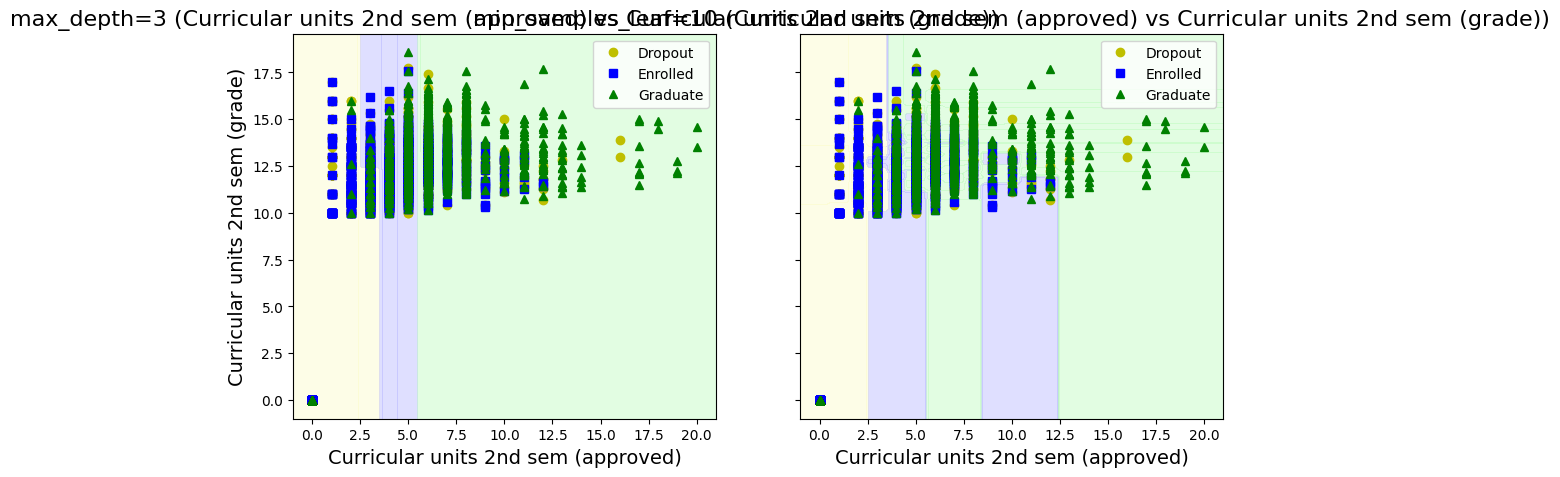

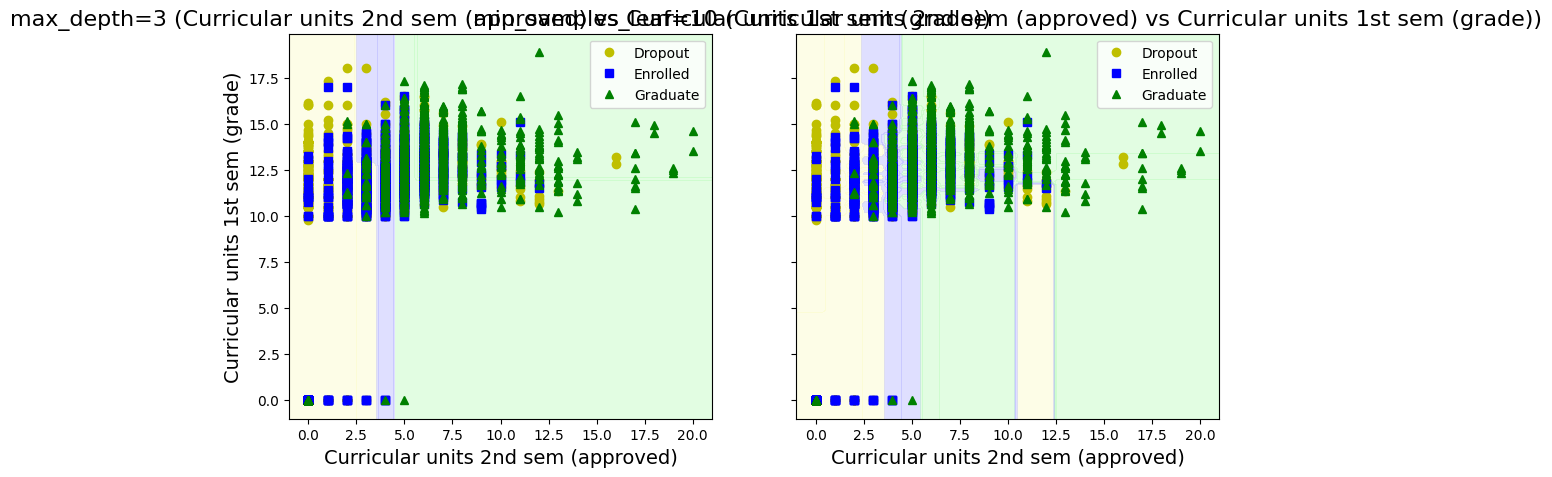

In [37]:
for (feature1, feature2), score in best_combinations:
    X_plot = X_new[[feature1, feature2]].values
    y_plot = y_encoded

    tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=3)
    tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)

    tree_reg1.fit(X_plot, y_plot)
    tree_reg2.fit(X_plot, y_plot)

    fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

    plt.sca(axes[0])
    plot_decision_boundary_with_regression(tree_reg1, X_plot, y_plot)
    plt.xlabel(feature1, fontsize=14)
    plt.ylabel(feature2, fontsize=14)
    plt.title(f"max_depth=3 ({feature1} vs {feature2})", fontsize=16)

    plt.sca(axes[1])
    plot_decision_boundary_with_regression(tree_reg2, X_plot, y_plot)
    plt.xlabel(feature1, fontsize=14)
    plt.title(f"min_samples_leaf=10 ({feature1} vs {feature2})", fontsize=16)

    plt.show()


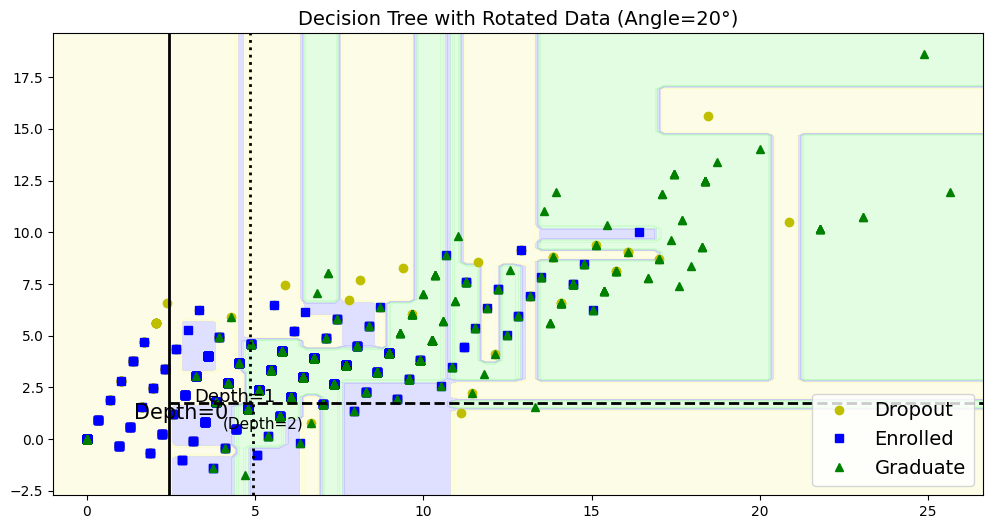

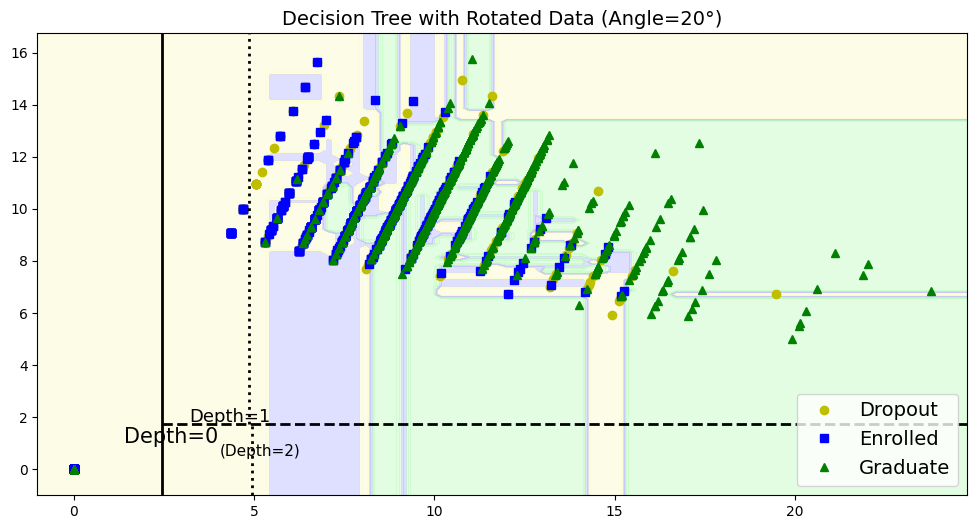

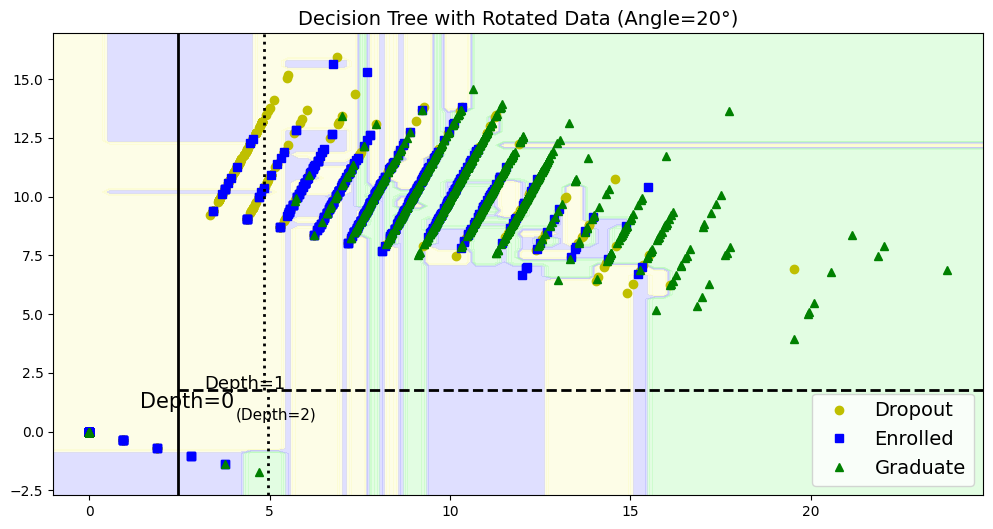

In [49]:
def rotation_analysis(X, y, angle_degrees=20):
    angle = np.pi / 180 * angle_degrees
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    X_rotated = X.dot(rotation_matrix)

    tree_clf_rotated = DecisionTreeClassifier(random_state=42)
    tree_clf_rotated.fit(X_rotated, y)

    plt.figure(figsize=(12, 6))
    plot_decision_boundary_with_split_lines(tree_clf_rotated, X_rotated, y, legend=True)
    plt.title(f"Decision Tree with Rotated Data (Angle={angle_degrees}°)", fontsize=14)
    plt.show()

for (feature1, feature2), score in best_combinations:
    X_plot = X_new[[feature1, feature2]].values
    X_train, X_val, y_train, y_val = train_test_split(X_plot, y_encoded, test_size=0.2, random_state=42)

    rotation_analysis(X_train, y_train, angle_degrees=20)